# Caso de estudio Módulo 2 – Aprendizaje Supervisado
por: Osiris Contreras Trillos 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

La compañía E-Corp cuya principal operación es la venta de producto de lujo, ha lanzado desde hace
un año su sito de e-commerce donde ofrecen una variedad importante de los productos que pueden
encontrarse en sus tiendas físicas. El objetivo de esta estrategia es expandir su base de clientes
actuales, a través de nuevos canales de compra y tener mayor cobertura en sitios donde no se
encuentran tiendas físicas actualmente.
Sin embargo, en los últimos informes presentados a la dirección, se evidencia que las ventas que son
atribuidas al canal digital (e-commerce) no representan un porcentaje importante de participación
con respecto al total de las ventas. Esto ha hecho que el retorno a la inversión realizada para la
creación y mantenimiento del sitio web no sea la esperada por los directivos. El área encargada del
canal digital, considera que las campañas de marketing no están siendo efectivas y este gasto
representa un rubro importante que puede llegar a optimizarse. Estas son algunas de las hipótesis que
el equipo de canales digitales cree sobre el problema de ventas:
● Actualmente las campañas de marketing enfocadas a la adquisición de nuevos clientes utilizan
atributos muy generales que pueden no ser relevantes para influir en la decisión de compra.
● No se tiene claro cuáles son los clientes potenciales o con mayor probabilidad de realizar una
compra una vez visiten el sitio web, por lo tanto la inversión en pauta puede no estar llegando
a los clientes que generan ingresos.
Por ello, la dirección ha contratado a su equipo de consultores para abordar el problema descrito a
través del uso de modelos de ML. En otras palabras, quieren conocer si pueden anticiparse a la
identificación de clientes potenciales y así optimizar su inversión en pauta digital utilizando atributos
que describan mejor a estos clientes potenciales.

## a. Diseño de solución propuesto
El diseño de solución propuesto para abordar el problema de E-Corp con respecto a la optimización de su inversión en el canal digital consta de los siguientes pasos:

Análisis de datos:

Se realizará un análisis exploratorio de los datos disponibles para comprender su estructura y encontrar patrones relevantes.
Selección de características:

Se identificarán las características más importantes que describan a los clientes potenciales, incluyendo variables demográficas y de comportamiento en el sitio web.
Preprocesamiento de datos:

Se limpiarán los datos y se realizará el preprocesamiento necesario, como la codificación de variables categóricas y el manejo de valores faltantes.
Modelado de Machine Learning:

Se utilizarán técnicas de aprendizaje supervisado, como Regresión Logística o Árboles de Decisión, para construir un modelo predictivo que identifique a los clientes potenciales.
Evaluación del modelo:

Se evaluará el rendimiento del modelo utilizando métricas de clasificación como precisión, recall y F1-score, asegurando que pueda identificar efectivamente a los clientes potenciales.
Optimización de inversión en pauta digital:

Se utilizarán las predicciones del modelo para dirigir las campañas de marketing a los segmentos de clientes identificados como potenciales compradores, mejorando así la eficacia de las campañas y el retorno de la inversión.
Iteración y mejora continua:

Este enfoque integral combina análisis de datos, modelado de machine learning y optimización estratégica para abordar el desafío específico de E-Corp y mejorar su rendimiento en el canal digital.

## b. Limpieza y transformación de los datos

In [5]:
# Lectura de los datos
df_original = pd.read_csv("ecommerce-data.csv")
df_original.head()


,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Tamaño del dataset
print('Numero de filas:', df_original.shape[0]," ",'Numero de columnas:', df_original.shape[1])

Numero de filas: 12330   Numero de columnas: 18


In [7]:
# Información general del dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Basándonos en los resultados de info, vemos que no hay valores nulos en los datos y los diferentes tipos de datos de las columnas

In [8]:
# Descripción estadística general de las variables numéricas
df_original.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
# Descripción estadística general de las variables categóricas
df_original.describe(include=['object'])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


Basándonos en los resultados de la descripción, vemos que estas variables son las primeras y más frecuentes en el conjunto de datos: May y Returnin_Visitor

## análisis exploratorio de los datos

In [10]:
# Separación de variables númericas y categóricas
cats = ['Month', 'VisitorType']
nums = ['Reviews','Reviews_Duration',	'Informational', 'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'OperatingSystems',	'Browser',	'Region', 'TrafficType']

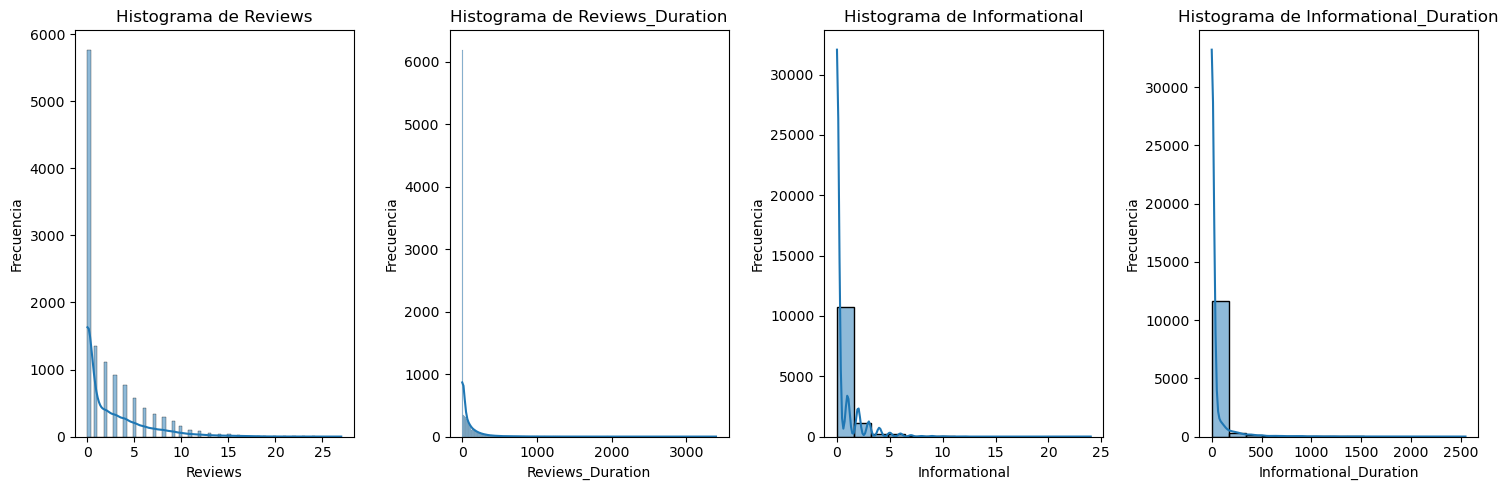

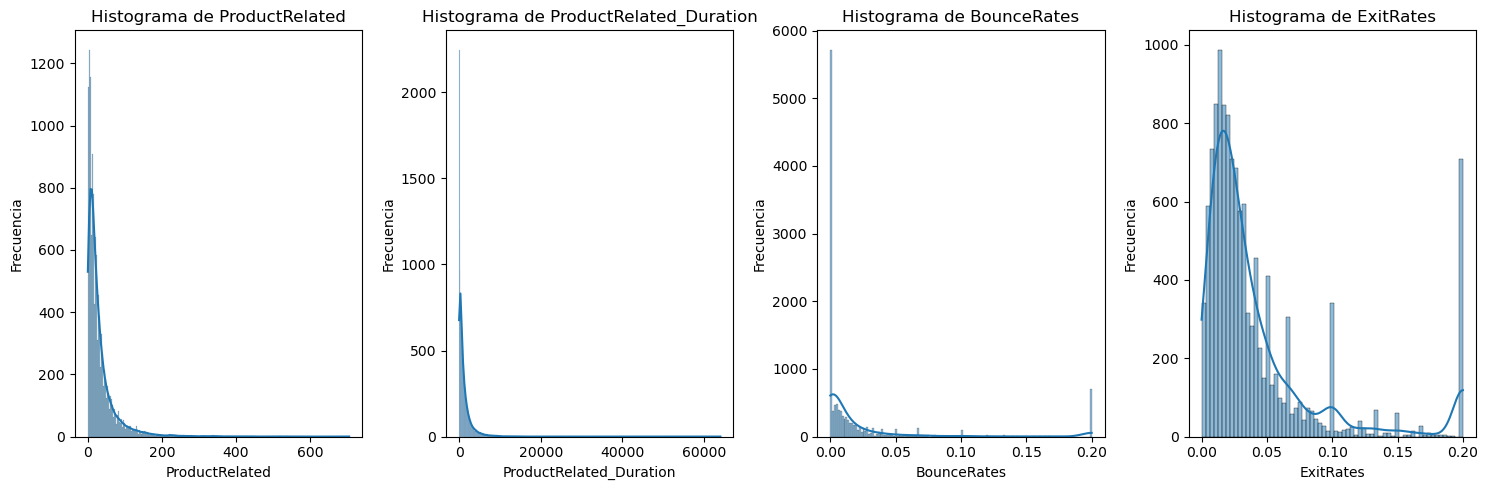

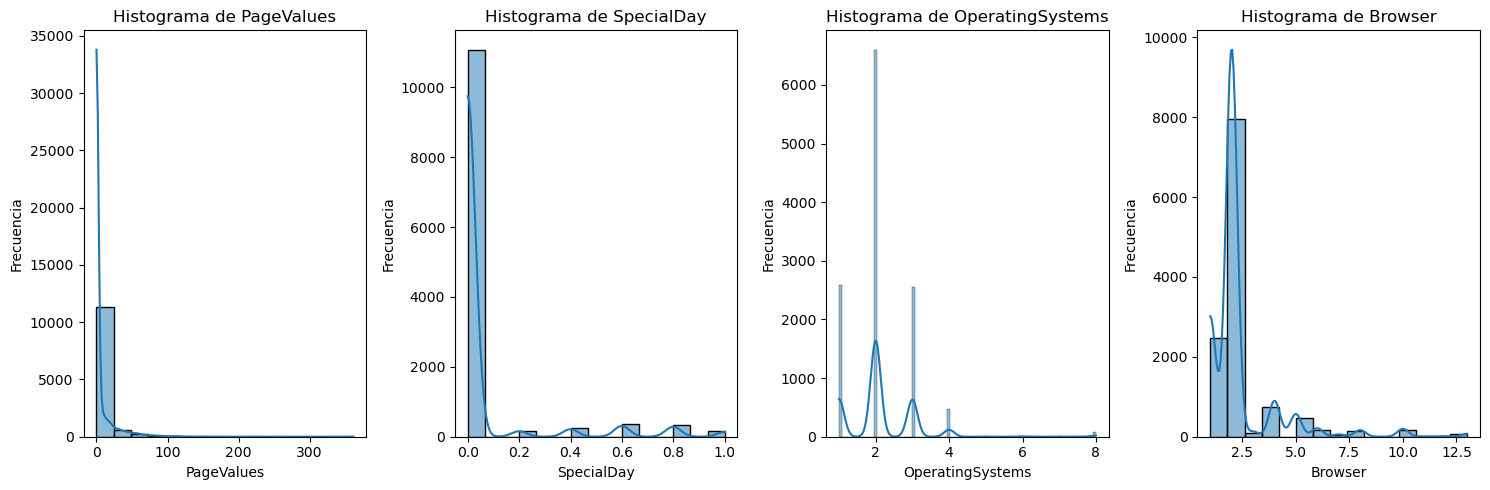

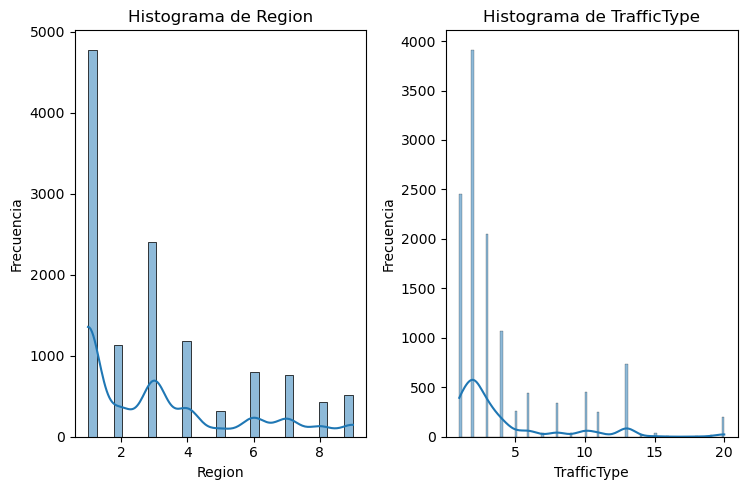

In [11]:
# Configurar el número de columnas en la disposición de subplots
num_columnas = 4

# Histogramas para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.histplot(df_original[num_var], kde=True)
    plt.title(f'Histograma de {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

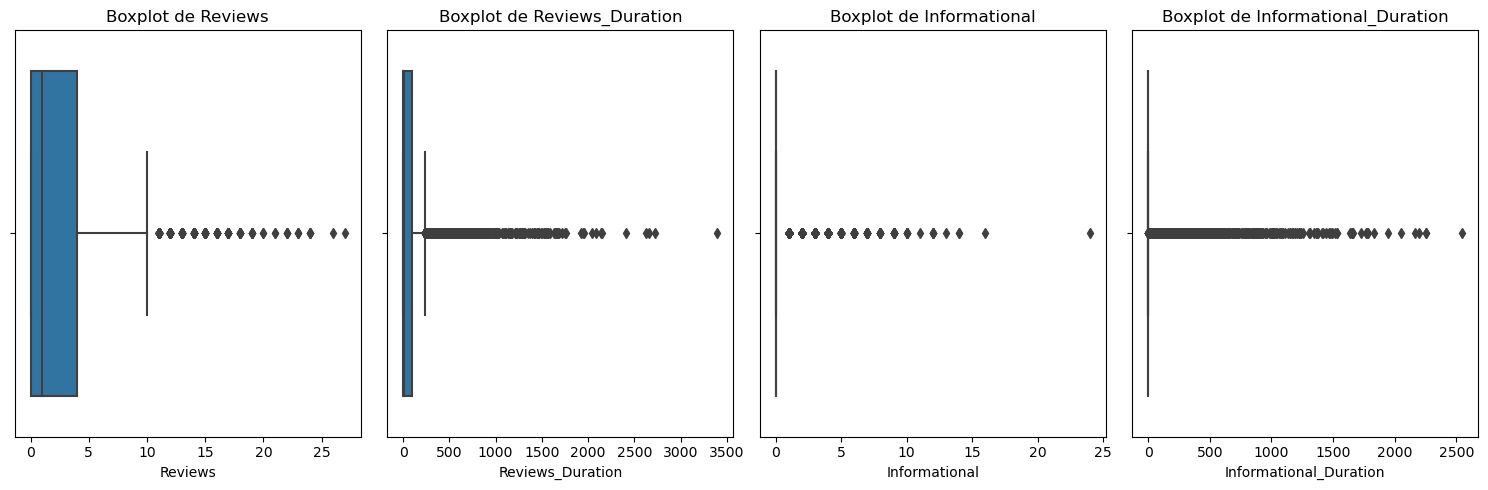

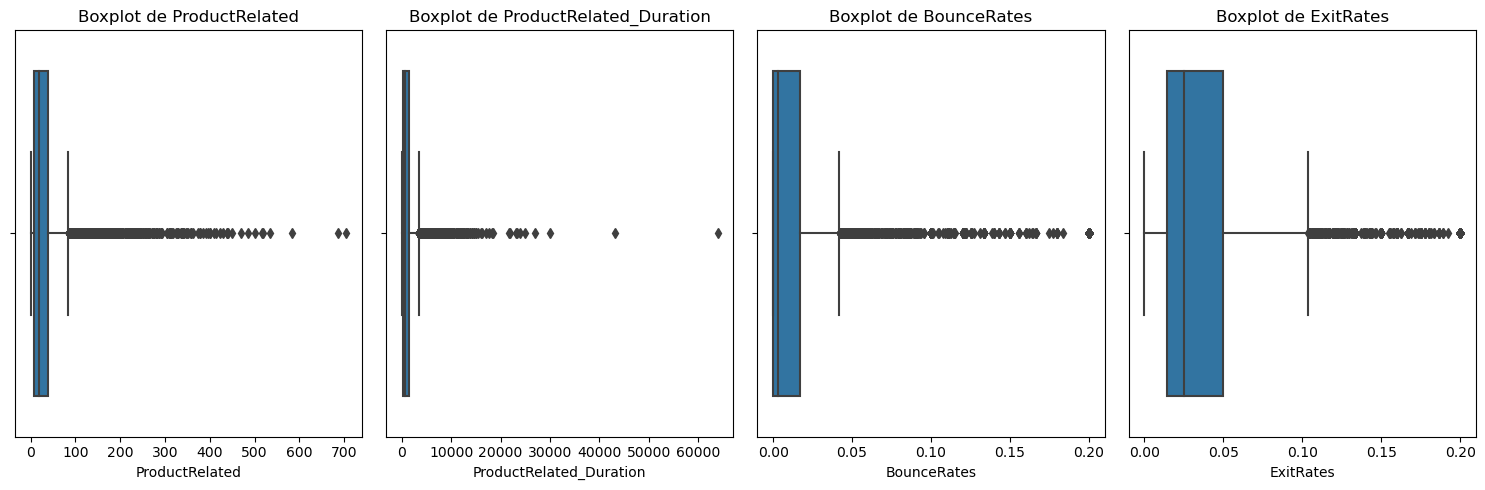

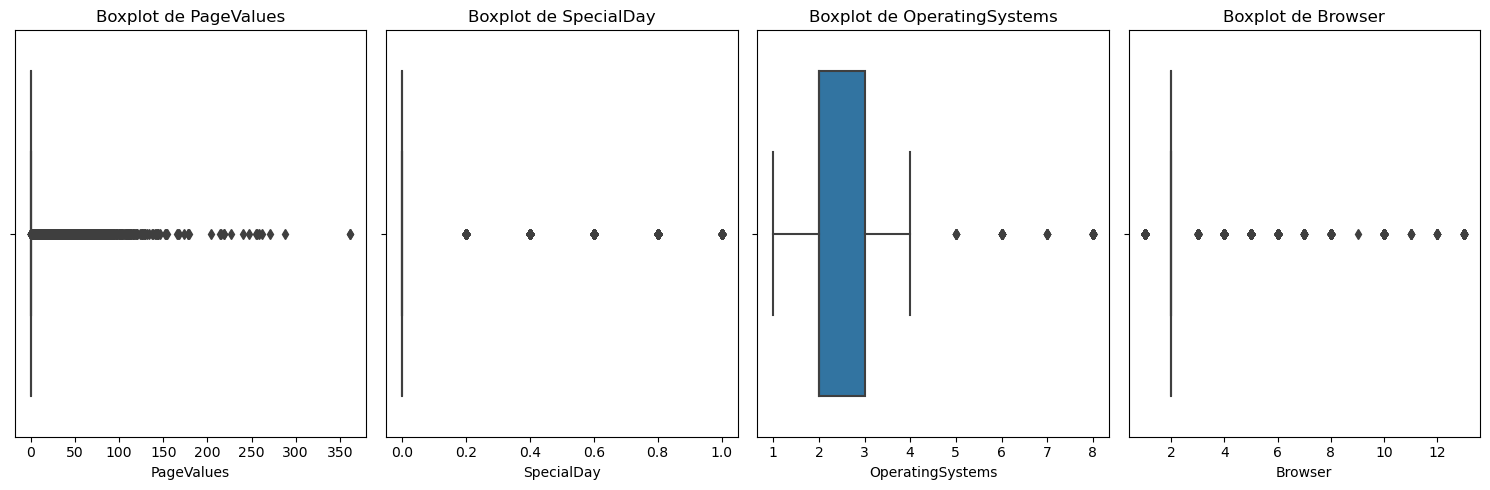

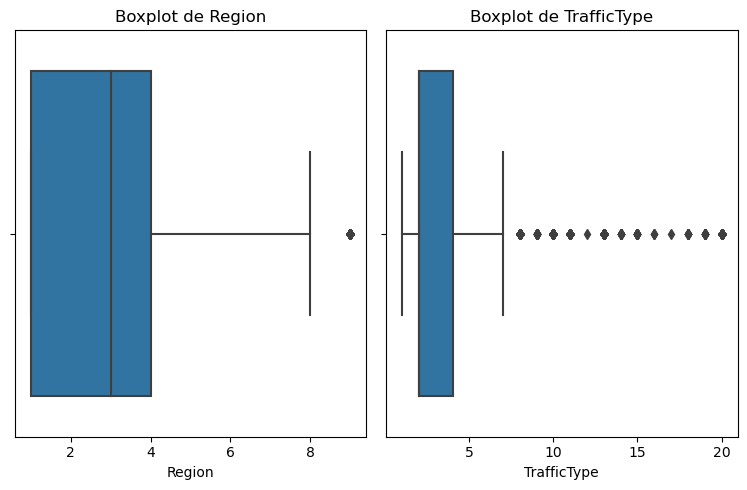

In [12]:
# Boxplots para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.boxplot(x=df_original[num_var])
    plt.title(f'Boxplot de {num_var}')
    plt.xlabel(num_var)
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

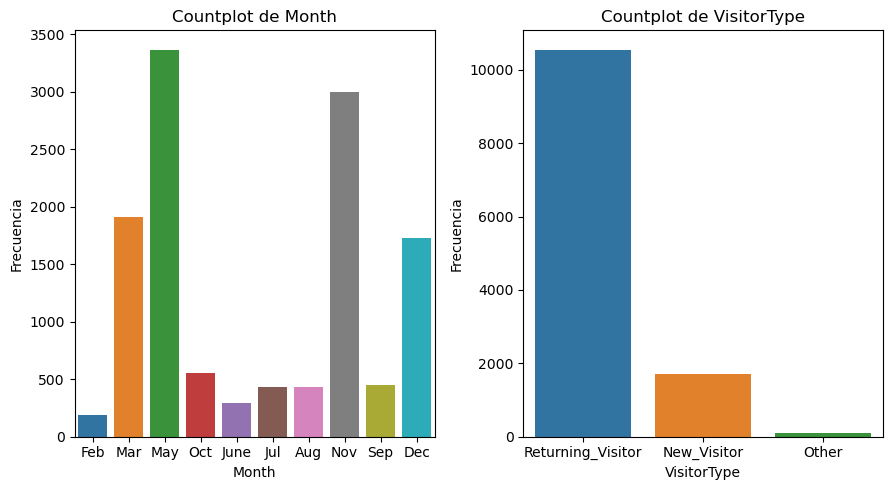

In [13]:
# Countplots para variables categóricas
for i, cat_var in enumerate(cats):
    if i % num_columnas == 0:
        plt.figure(figsize=(18, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.countplot(x=cat_var, data=df_original)
    plt.title(f'Countplot de {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(cats) - 1:
        plt.tight_layout()
        plt.show()

## Limpieza y transformación de los datos

In [14]:
# Copia del dataset para aplicar transformaciones y limpieza de datos
df1 = df_original.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df1['Month'] = label_encoder.fit_transform(df1['Month'])
df1['VisitorType'] = label_encoder.fit_transform(df1['VisitorType'])

# Conversión de datos booleanos a numéricos
df1['Weekend'] = df1['Weekend'].astype(int)
df1['Purchase'] = df1['Purchase'].astype(int)

print(df1.head())

   Reviews  Reviews_Duration  Informational  Informational_Duration  \
0        0               0.0              0                     0.0   
1        0               0.0              0                     0.0   
2        0               0.0              0                     0.0   
3        0               0.0              0                     0.0   
4        0               0.0              0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   PageValues  SpecialDay  Month  OperatingSystems  Browser  Region  \
0         0.0         0.0      2                 1        1       1   
1         

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
df1.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las características numéricas a normalizar o estandarizar
caracteristicas_numericas = df1[nums]

# Inicializar el escalador MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar las características utilizando MinMaxScaler
caracteristicas_numericas_normalizadas = min_max_scaler.fit_transform(caracteristicas_numericas)

# Inicializar el escalador StandardScaler
standard_scaler = StandardScaler()

# Estandarizar las características utilizando StandardScaler
caracteristicas_numericas_estandarizadas = standard_scaler.fit_transform(caracteristicas_numericas)

# Convertir las características normalizadas y estandarizadas de nuevo a un DataFrame de pandas
caracteristicas_normalizadas_df = pd.DataFrame(caracteristicas_numericas_normalizadas, columns=nums)
caracteristicas_estandarizadas_df = pd.DataFrame(caracteristicas_numericas_estandarizadas, columns=nums)

# Mostrar las primeras filas del DataFrame con características normalizadas
print("Características normalizadas:")
print(caracteristicas_normalizadas_df.head())

# Mostrar las primeras filas del DataFrame con características estandarizadas
print("\nCaracterísticas estandarizadas:")
print(caracteristicas_estandarizadas_df.head())

Características normalizadas:
   Reviews  Reviews_Duration  Informational  Informational_Duration  \
0      0.0               0.0            0.0                     0.0   
1      0.0               0.0            0.0                     0.0   
2      0.0               0.0            0.0                     0.0   
3      0.0               0.0            0.0                     0.0   
4      0.0               0.0            0.0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0        0.001418                 0.000000         1.00       1.00   
1        0.002837                 0.001000         0.00       0.50   
2        0.001418                 0.000000         1.00       1.00   
3        0.002837                 0.000042         0.25       0.70   
4        0.014184                 0.009809         0.10       0.25   

   PageValues  SpecialDay  OperatingSystems   Browser  Region  TrafficType  
0         0.0         0.0          0.000000  

## Preparación de los datos

In [19]:
# Comprobación de valores duplicados
df1.duplicated().sum()

125

In [20]:
# Eliminación de valores duplicados
df1 = df1.drop_duplicates()

# Comprobación de valores duplicados
df1.duplicated().sum()

0

In [21]:
# Separación de caracteristicas y target (X , y)
y = df1['Purchase']
X = df1.drop(['Purchase'],axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de validación:",  x_test.shape)


Tamaño del conjunto de entrenamiento: (9764, 17)
Tamaño del conjunto de validación: (2441, 17)


## Selección de variables

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=1.5))
sel_.fit(x_train, y_train)

#Imprimir coeficientes del estimador
print("Coeficientes del estimador Lasso:")
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
best_features = X.columns[sel_.get_support()]
print(best_features)

Coeficientes del estimador Lasso:
[ 0.00000000e+00  1.39668775e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.35134808e-05 -0.00000000e+00 -0.00000000e+00
  5.13265719e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
Index(['Reviews_Duration', 'ProductRelated_Duration', 'PageValues'], dtype='object')


Las variables 'Reviews_Duration', 'ProductRelated_Duration' y 'PageValues' son las más relevantes según el modelo Lasso y tienen un impacto significativo en la variable objetivo.
Las otras variables, cuyos coeficientes son cero o muy cercanos a cero, pueden ser menos importantes para el modelo y pueden ser candidatas para ser eliminadas.